<table align="center">
  <a target="_blank" href="https://colab.research.google.com/github/martinlf6/schwab-ds-takehome-FengLiu/blob/main/02_aspects.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a>
</table>

In [29]:
!pip install datasets==3.6.0 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/146.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import spacy
import pandas as pd
from datasets import load_dataset

In [8]:
# A) Load dataset
ds = load_dataset("financial_phrasebank", "sentences_50agree")
df = ds["train"].to_pandas().rename(columns={"sentence":"text","label":"y"}) # Convert to Pandas dataframe. ds["train"] selects the training split of the dataset
label_map = {0: "negative", 1: "neutral", 2: "positive"} # Create a mapping from numbers to labels
df["label"] = df["y"].map(label_map) # Apply the mapping: replaces each numeric value in column y with its text label and creates a new column label with human-readable sentiment.

In [9]:
df

,text,y,label
0,"According to Gran , the company has no plans t...",1,neutral
1,Technopolis plans to develop in stages an area...,1,neutral
2,The international electronic industry company ...,0,negative
3,With the new production plant the company woul...,2,positive
4,According to the company 's updated strategy f...,2,positive
...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,0,negative
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1,neutral
4843,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative
4844,Net sales of the Paper segment decreased to EU...,0,negative


In [6]:
# B) Quick stats
print(df.head())
print(df["label"].value_counts())
df["len"] = df["text"].str.split().apply(len) # .split() splits each list in text column (sentence) on whitespace, another word, splits each sentence into words. apply(len) applies the built-in Python len() function to each list in text column (sentence) that gives the number of words in the sentence.
print(df["len"].describe())


                                                text  y     label
0  According to Gran , the company has no plans t...  1   neutral
1  Technopolis plans to develop in stages an area...  1   neutral
2  The international electronic industry company ...  0  negative
3  With the new production plant the company woul...  2  positive
4  According to the company 's updated strategy f...  2  positive
label
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64
count    4846.000000
mean       23.101114
std         9.958474
min         2.000000
25%        16.000000
50%        21.000000
75%        29.000000
max        81.000000
Name: len, dtype: float64


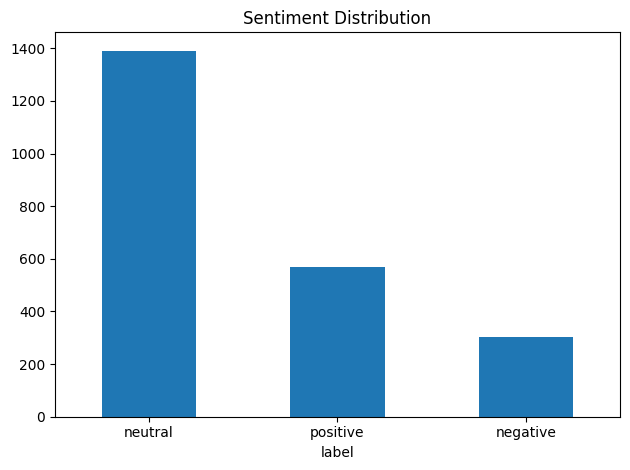

In [ ]:
# C) Visualize sentiment distribution
plt.figure()
df["label"].value_counts().plot(kind="bar", rot=0, title="Sentiment Distribution")
plt.tight_layout()
plt.show()
# The visual shows the data is imblanced with much more neutral sentiment than positive which is more than negative.

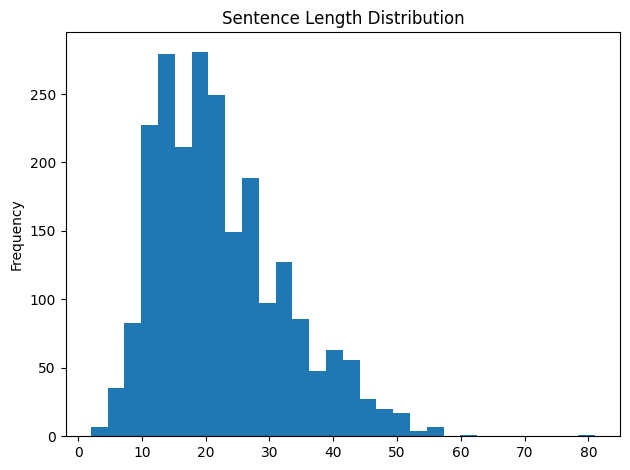

In [ ]:
# D) Sentence length histogram
plt.figure()
df["len"].plot(kind="hist", bins=30, title="Sentence Length Distribution")
plt.tight_layout()
plt.show() # The visual shows it's a right-skewed histogram (mean > median > mode) with the bulk of the data points are settled on the left side, whereas a few extreme values drag the tail on the right.

In [ ]:
# E) Common words per class Loop through each sentiment (simple bag-of-words view)
# Normalization function
def normalize(s):
    s = s.lower() # Converts all text to lowercase.
    s = re.sub(r"[^\w\s]", " ", s) # Replace any character that is not a word (\w) or whitespace (\s) with a space.
    return s

# Define stopwords
stop = set(ENGLISH_STOP_WORDS) | {"s","said","u","’s","—","–","..."} # ENGLISH_STOP_WORDS is a built-in list of common words from scikit-learn (like "the", "and", "is"). These words will be ignored because they don’t carry much meaning.

# Function to get top terms
def top_terms(subset, k=20):
    all_tokens = [] # Define a variable, all_tokens, and assigns it an empty list.
    for t in subset["text"].map(normalize): # Apply normalize() to each sentence in the subset.
        toks = [w for w in t.split() if w not in stop and not w.isdigit()] # Drop stopwords and pure numbers
        all_tokens.extend(toks) # Collects all tokens from all sentences into a big list.
    return Counter(all_tokens).most_common(k) # Counts word frequencies and returns the top k most common tokens.

# Loop through each sentiment
for lab in ["negative","neutral","positive"]:
    print(f"\nTop tokens for {lab}:")
    print(top_terms(df[df["label"]==lab], k=20))



Top tokens for negative:
[('eur', 251), ('mn', 186), ('profit', 122), ('net', 84), ('sales', 72), ('year', 72), ('quarter', 71), ('operating', 68), ('mln', 62), ('period', 58), ('million', 57), ('finnish', 57), ('decreased', 52), ('loss', 51), ('compared', 42), ('m', 40), ('company', 38), ('oyj', 35), ('fell', 35), ('corresponding', 34)]

Top tokens for neutral:
[('company', 225), ('eur', 130), ('finland', 109), ('shares', 105), ('business', 97), ('group', 95), ('million', 91), ('services', 82), ('share', 77), ('market', 61), ('sales', 60), ('finnish', 59), ('new', 59), ('value', 59), ('m', 58), ('total', 56), ('capital', 52), ('products', 49), ('financial', 49), ('helsinki', 45)]

Top tokens for positive:
[('eur', 375), ('mn', 223), ('profit', 172), ('net', 166), ('year', 155), ('sales', 129), ('period', 125), ('million', 118), ('m', 116), ('finnish', 108), ('operating', 103), ('mln', 99), ('quarter', 89), ('company', 86), ('rose', 82), ('increased', 74), ('loss', 60), ('correspondin

In [ ]:
df

,text,y,label,len
0,"According to Gran , the company has no plans t...",1,neutral,25
1,"For the last quarter of 2010 , Componenta 's n...",2,positive,39
2,"In the third quarter of 2010 , net sales incre...",2,positive,29
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive,24
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive,22
...,...,...,...,...
2259,Operating result for the 12-month period decre...,0,negative,27
2260,HELSINKI Thomson Financial - Shares in Cargote...,0,negative,40
2261,LONDON MarketWatch -- Share prices ended lower...,0,negative,26
2262,Operating profit fell to EUR 35.4 mn from EUR ...,0,negative,23


Bias/Data quality checks to include in the EDA notebook:
*   Class imbalance (e.g., are positive sentences over-represented?): yes, more neutral sentences than positive which is more than negative.
*   Length extremes and distribution (very short/very long): ranging from 2 to 81, with mean of 22 and standard deviation of 10.
*   Duplicates or near-duplicates: million is in different formats such as mn, million, mln and m.
*   Topic/entity imbalance (are a few companies dominating?): more topics related to **eur** (the official currency of European Union), **profit** and **net** (negative and positive).




